In [1]:
import pandas as pd #pandas library is used datasets into python.
  
house_price_df=pd.read_csv("house_price_data.csv") 

house_price_df.shape # this command returns no. of rows and columns

house_price_df.columns # returns the column names from dataframe

house_price_df["LotArea"].describe() # to access a single column from the dataframe

house_price_df["SalePrice"] # returns the descriptive  statistics of a column

house_price_df['LotArea'].dtype #returns the datatype of c

house_price_df.columns

    

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2]:
pd.get_dummies(house_price_df['LotShape'])# one-hot encoding for categorical variable

,IR1,IR2,IR3,Reg
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1455,0,0,0,1
1456,0,0,0,1
1457,0,0,0,1
1458,0,0,0,1


In [3]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
le.fit_transform(house_price_df['LotShape'])# Label encoding a categorical column

array([3, 3, 0, ..., 3, 3, 3])

In [4]:
house_price_df.isnull().sum() # To fetch the count of missing values in every column

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# Creating a custom dataframe

students_info_df=pd.DataFrame({'Student_Name':['manohar','rakshit','pooja'],
                              'Address':['hyderabad','chennai','pune'],
                              'Score':[90,89,88]})

students_info_df

,Student_Name,Address,Score
0,manohar,hyderabad,90
1,rakshit,chennai,89
2,pooja,pune,88


In [6]:
a_dict={'Source_Location':[9.23,7.57],
        'Destination_Location':[34.34,12.23],
        'Distance':23,
        'Cab_number':'TS15XXXX',
        'OTP':1245 }
         

a_dict['Source_Location']

[9.23, 7.57]

In [7]:
missing_values_df=pd.DataFrame({'Column_Name':['MsZonig','LotFrontage','LotShape','LandContour'],
                             'Missing_value_count':[0,259,0,0],
                             'Missing_value_percentage':[0,17.74,0,0]})


missing_values_df


,Column_Name,Missing_value_count,Missing_value_percentage
0,MsZonig,0,0.00
1,LotFrontage,259,17.74
2,LotShape,0,0.00
3,LandContour,0,0.00


In [8]:
house_price_df["LotFrontage"].isnull().sum() # to fetch the count of no. of missing values in a particular column

259

In [9]:
missing_values_df=pd.DataFrame({'Column_Name':house_price_df.columns,
              'Missing_value_count':house_price_df.isnull().sum(),
              'Missing_value_percentage':house_price_df.isnull().sum()/house_price_df.shape[0]*100})

missing_values_df.sort_values(by='Missing_value_percentage',ascending=False)#sorting in descending order
cols_to_drop=list(missing_values_df[missing_values_df['Missing_value_percentage']>50]['Column_Name'])

cols_to_drop

for col in house_price_df.columns:
    if len(house_price_df[col].unique())==1 or len(house_price_df[col].unique())==house_price_df.shape[0]:
        cols_to_drop.append(col)
        
cols_to_drop


['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id']

In [10]:
len(house_price_df['SaleType'].unique())

9

In [11]:
house_price_df.drop(columns=cols_to_drop,inplace=True)

In [12]:
house_price_df.shape

(1460, 76)

# Feature Engg:

In [13]:
house_price_df['TotalFlrSF']=house_price_df['1stFlrSF']+house_price_df['2ndFlrSF']

house_price_df['TotalFlrSF']

house_price_df['TotBsmtBath']=house_price_df['BsmtFullBath']+house_price_df['BsmtHalfBath']

house_price_df['TotBsmtBath']

house_price_df['TotBath']=house_price_df['FullBath']+house_price_df['HalfBath']

house_price_df['TotBath']



0       3
1       2
2       3
3       1
4       3
       ..
1455    3
1456    2
1457    2
1458    1
1459    2
Name: TotBath, Length: 1460, dtype: int64

In [14]:
house_price_df.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],inplace=True)

In [15]:
house_price_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscV

In [16]:
num_cols=[col for col in house_price_df.columns if house_price_df[col].dtype=='int64' or house_price_df[col].dtype=='float']
cat_cols=[col for col in house_price_df.columns if house_price_df[col].dtype=='object']

cat_cols
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'TotalFlrSF',
 'TotBsmtBath',
 'TotBath']

# Checking Correlations:

In [17]:
import numpy as np
from scipy.stats import f_oneway

pcc_value=[]
p_values=[]
for col in num_cols:
    pcc_value.append(np.corrcoef(house_price_df[col],house_price_df['SalePrice']))
    
# pcc_value

for col in cat_cols:
    def anova(col):
        categories_list=list(house_price_df[col].value_counts().index)
        result=f_oneway(*(house_price_df[house_price_df[col]==category]['SalePrice']for category in categories_list))
        return p_values.append(result[1])
    anova(col)
    
p_values

col_df=pd.DataFrame({'column_name':cat_cols,
                      'p_value_col':p_values
                    })
col_df

corre_cols=list(col_df[col_df['p_value_col']<0.05]['column_name'])
corre_cols

not_corre_cols=list(col_df[col_df['p_value_col']>0.05]['column_name'])
not_corre_cols
        
    


['Street', 'Utilities', 'LandSlope']

In [18]:
house_price_df.drop(columns=not_corre_cols,inplace=True)

In [19]:
house_price_df.shape

(1460, 70)

In [20]:
y=house_price_df['SalePrice']

house_price_df.drop(columns='SalePrice',inplace=True)

# Train_Test_Split

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(house_price_df,y,test_size=0.2,random_state=42)

X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalFlrSF,TotBsmtBath,TotBath
254,20,RL,70.0,8400,Reg,Lvl,Inside,NAmes,Norm,Norm,...,0,0,0,6,2010,WD,Normal,1314,1,1
1066,60,RL,59.0,7837,IR1,Lvl,Inside,Gilbert,Norm,Norm,...,0,0,0,5,2009,WD,Normal,1571,0,3
638,30,RL,67.0,8777,Reg,Lvl,Inside,Edwards,Feedr,Norm,...,0,0,0,5,2008,WD,Normal,796,0,1
799,50,RL,60.0,7200,Reg,Lvl,Corner,SWISU,Feedr,Norm,...,0,0,0,6,2007,WD,Normal,1768,1,2
380,50,RL,50.0,5000,Reg,Lvl,Inside,SWISU,Norm,Norm,...,0,0,0,5,2010,WD,Normal,1691,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,78.0,9317,IR1,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,0,3,2007,WD,Normal,1314,0,2
1130,50,RL,65.0,7804,Reg,Lvl,Inside,SWISU,Norm,Norm,...,0,0,0,12,2009,WD,Normal,1981,1,2
1294,20,RL,60.0,8172,Reg,Lvl,Inside,Edwards,Norm,Norm,...,0,0,0,4,2006,WD,Normal,864,1,1
860,50,RL,55.0,7642,Reg,Lvl,Corner,Crawfor,Norm,Norm,...,0,0,0,6,2007,WD,Normal,1426,0,2


In [56]:
num_cols=[col for col in house_price_df.columns if house_price_df[col].dtype=='int64' or house_price_df[col].dtype=='float64']
cat_cols=[col for col in house_price_df.columns if house_price_df[col].dtype=='object']

cat_cols
#num_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# Missing Value Imputation

In [23]:
for col in num_cols:
    X_train[col]=X_train[col].fillna(X_train[col].mean())
    X_test[col]=X_test[col].fillna(X_train[col].mean())
    
X_test['LotArea']
    


C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


892      8414
1105    12256
413      8960
522      5000
1036    12898
        ...  
479      5925
1361    16158
802      8199
651      9084
722      8120
Name: LotArea, Length: 292, dtype: int64

In [24]:
for col in cat_cols:
    X_train[col]=X_train[col].fillna(X_train[col].mode()[0])
    X_test[col]=X_test[col].fillna(X_train[col].mode()[0])

C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
house_price_df['SaleType'].mode()[0]

'WD'

# Scaling the continuous variables:

In [26]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [27]:
minmaxscaler=MinMaxScaler()

for col in num_cols:
    X_train[col]=minmaxscaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=minmaxscaler.transform(np.array(X_test[col]).reshape(-1,1))

C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dipti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

# One_Hot Encoding the categorical variables:

In [28]:
oe_train_df=pd.get_dummies(X_train[cat_cols])
oe_test_df=pd.get_dummies(X_test[cat_cols])


In [29]:
 oe_test_df.shape 

(292, 197)

In [30]:
X_train_oe,X_test_oe=oe_train_df.align(oe_test_df,axis=1,join='inner',fill_value=0)

X_test_oe.shape

(292, 195)

In [31]:
X_train_final=pd.concat([X_train_oe,X_train[num_cols]],axis=1)
X_test_final=pd.concat([X_test_oe,X_test[num_cols]],axis=1)

X_test_final

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalFlrSF,TotBsmtBath,TotBath
892,0,0,0,1,0,0,0,0,1,0,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.00,0.138282,0.333333,0.25
1105,0,0,0,1,0,1,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.272727,1.00,0.431047,0.333333,0.75
413,0,0,0,0,1,0,0,0,1,0,...,0.235507,0.0,0.0,0.0,0.0,0.181818,1.00,0.130746,0.000000,0.25
522,0,0,0,0,1,0,0,0,1,0,...,0.065217,0.0,0.0,0.0,0.0,0.818182,0.00,0.250565,0.000000,0.50
1036,0,0,0,1,0,1,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.727273,0.75,0.242276,0.333333,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,1,0,0,0,1,1,...,0.000000,0.0,0.0,0.0,0.0,0.181818,0.25,0.150151,0.000000,0.25
1361,0,0,0,1,0,1,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.454545,0.75,0.225320,0.333333,0.50
802,0,0,0,1,0,0,0,0,1,0,...,0.000000,0.0,0.0,0.0,0.0,0.818182,0.50,0.211379,0.333333,0.75
651,0,0,0,1,0,0,0,0,1,0,...,0.000000,0.0,0.0,0.0,0.0,0.818182,0.75,0.221552,0.333333,0.25


In [32]:
X_train_final.shape

(1168, 228)

# Training a Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
linreg=LinearRegression()
linreg.fit(X_train_final,y_train)
predictions=linreg.predict(X_test_final)
predictions

array([158576., 345160.,  97512., 179368., 338400.,  57760., 255192.,
       155264.,  50240., 145280., 150552., 105824.,  89000., 231336.,
       177872., 133864., 187008., 131024., 119776., 210576., 169184.,
       203128., 178736., 125488., 201456., 137200., 199440., 100944.,
       173920., 206176., 168872., 272192., 234240., 117600., 245072.,
       140760., 137776., 204888., 319392., 115344., 134752., 225056.,
        98528., 352216., 129344., 143416., 102992., 134704., 412080.,
       142432., 120368., 254712.,  98224., 288976., 161584., 229024.,
       211088., 185360., 128712.,  97408.,  72544., 165720., 318096.,
       258096., 314392., 202912.,  93976., 291056., 124496., 177024.,
       131792., 125544., 107992.,  62248., 442056., 192736., 303552.,
       382384., 148240., 120592., 115488.,  14792., 116816., 107824.,
       164048., 155200., 248512., 215600., 131048., 196976., 128704.,
       147424., 186376., 258464., 120528., 188432., 205600., 156392.,
       202528., 2716

In [34]:
r2_score(y_test,predictions) # evaluating performance of trained model
mean_squared_error(y_test,predictions)

983437755.5513699

In [35]:
import numpy as np
np.corrcoef(house_price_df['LotArea'],y)# since pcc is close to zero hence weak coreelation

array([[1.        , 0.26384335],
       [0.26384335, 1.        ]])

In [36]:
house_price_df.shape

(1460, 69)

In [37]:
house_price_df['SaleType'].nunique()# fetch the count of unique values in a column

#or

len(house_price_df['SaleType'].value_counts())

9

# Plotting in Python

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <a list of 20 Patch objects>)

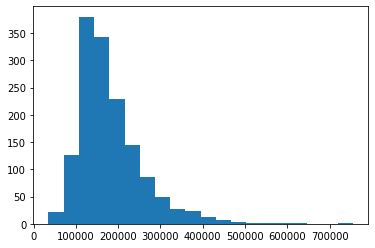

In [38]:
import matplotlib.pyplot as plt

plt.hist(y,bins=20)  #hist--histogram,bin

# Central Limit Theorem

(array([  1.,   0.,   3.,   1.,   2.,   0.,   3.,   3.,  11.,  14.,  11.,
         12.,  21.,  27.,  28.,  48.,  42.,  42.,  50.,  52.,  88., 104.,
        114., 119., 135., 148., 173., 161., 211., 213., 235., 251., 272.,
        265., 268., 297., 286., 288., 324., 313., 307., 306., 308., 292.,
        307., 286., 262., 239., 264., 227., 252., 197., 210., 174., 183.,
        160., 134., 160., 138., 122.,  87.,  82.,  75.,  87.,  64.,  63.,
         53.,  38.,  43.,  39.,  33.,  26.,  20.,  27.,  18.,   9.,  12.,
          9.,   8.,   9.,   7.,   4.,   3.,   2.,   6.,   3.,   1.,   2.,
          0.,   2.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([145877.34  , 146718.3536, 147559.3672, 148400.3808, 149241.3944,
        150082.408 , 150923.4216, 151764.4352, 152605.4488, 153446.4624,
        154287.476 , 155128.4896, 155969.5032, 156810.5168, 157651.5304,
        158492.544 , 159333.5576, 160174.5712, 161015.5848, 161856.5984,
        162697.612 , 16353

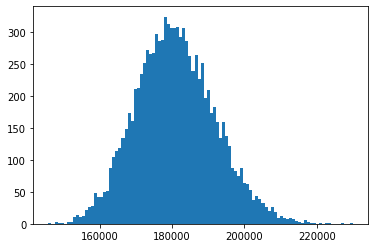

In [39]:
import seaborn as sns#Data visualization library


#sns.distplot(house_price_df['SalePrice'])

len(y)

sample_means=[]
for i in range(0,10000): #10000-->no. of samples
    sample_means.append(y.sample(n=50).mean())#50->sample size or no. of records
    
plt.hist(sample_means,bins=100)


In [40]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [41]:
import numpy as np

log_saleprice=y.apply(np.log)# mean=180921,median=163000,[mean>>median--right skewed,mean<<median--left skewed]-->so no normal distribution
                                          # To convert a un-normal distribution to normal distribution ,we can use exponential,logarithm,sq.root
                                          # so mean=~median
        
log_saleprice.describe() # mean=12.024051,median=12.001505(so normal distribution)

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

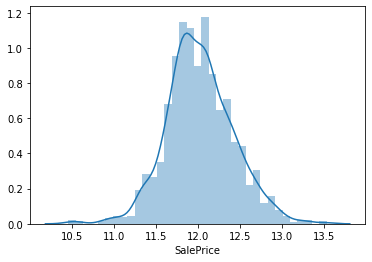

In [42]:
sns.distplot(log_saleprice)

{'whiskers': [<matplotlib.lines.Line2D at 0x24342f72708>,
 'caps': [<matplotlib.lines.Line2D at 0x24342f72fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24342f6ccc8>],
 'medians': [<matplotlib.lines.Line2D at 0x24342f78f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x24342f7ddc8>],
 'means': []}

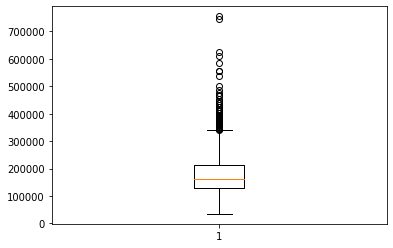

In [43]:
plt.boxplot(y)# boxplot using the matplotlib library

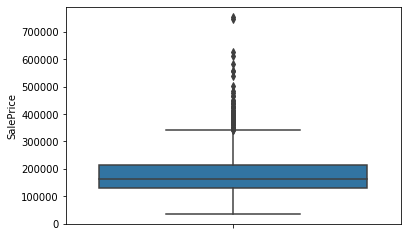

In [44]:
# Boxplot-->to check for the presence of outliers

sns.boxplot(y,orient='v')# to check  the presence of outliers in the data

In [45]:
house_price_df['LotArea'],y

(0        8450
 1        9600
 2       11250
 3        9550
 4       14260
         ...  
 1455     7917
 1456    13175
 1457     9042
 1458     9717
 1459     9937
 Name: LotArea, Length: 1460, dtype: int64,
 0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 1460, dtype: int64)

Text(0.5, 1.0, 'Scatter Plot')

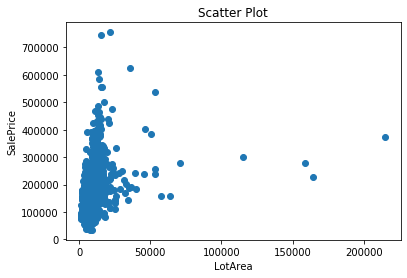

In [46]:
plt.scatter(house_price_df['LotArea'],y)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

plt.title('Scatter Plot')

In [47]:
#Column_Names=house_price_df.columns
con_cols=[]
cat_cols=[]

for col in house_price_df.columns:
    if house_price_df[col].dtype == 'int64' or house_price_df[col].dtype == 'float64':
        con_cols.append(col)
        
    else:
        cat_cols.append(col)
        
print(con_cols)

#or using list compprehension

con_cols_lscomp=[col for col in house_price_df.columns if house_price_df[col].dtype == 'int64' or house_price_df[col].dtype == 'float64']

cat_cols_lscomp=[col for col in house_price_df.columns if house_price_df[col].dtype == 'object']

con_cols_lscomp
        

        


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalFlrSF', 'TotBsmtBath', 'TotBath']


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalFlrSF',
 'TotBsmtBath',
 'TotBath']

In [48]:
import numpy as np
y.apply(np.log)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [49]:
def century(year):
    if year<=2000:
        return '20th Century'
    if year>2000:
        return '21st Century'
    
house_price_df['YearBuilt'].apply(century) #feature engg.

0       21st Century
1       20th Century
2       21st Century
3       20th Century
4       20th Century
            ...     
1455    20th Century
1456    20th Century
1457    20th Century
1458    20th Century
1459    20th Century
Name: YearBuilt, Length: 1460, dtype: object

In [50]:
house_price_df[house_price_df['SaleType']=='WD']#Filter the rows of dataframe based on the condition of a column

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalFlrSF,TotBsmtBath,TotBath
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,0,2,2008,WD,Normal,1710,1,3
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,...,0,0,0,5,2007,WD,Normal,1262,1,2
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,0,9,2008,WD,Normal,1786,1,3
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,...,0,0,0,2,2006,WD,Abnorml,1717,1,1
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,...,0,0,0,12,2008,WD,Normal,2198,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,Norm,...,0,0,0,8,2007,WD,Normal,1647,0,3
1456,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,Norm,...,0,0,0,2,2010,WD,Normal,2073,1,2
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,Norm,...,0,0,2500,5,2010,WD,Normal,2340,0,2
1458,20,RL,68.0,9717,Reg,Lvl,Inside,NAmes,Norm,Norm,...,0,0,0,4,2010,WD,Normal,1078,1,1


In [51]:
house_price_df.shape

(1460, 69)

In [52]:
house_price_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
      

In [53]:
import numpy as np

house_price_df['LotConfig'].apply(lambda x:len(x))# here we add a new column length_lotconfig_desc

house_price_df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
      

In [54]:
#Pearson Correlation Coefficient:

import numpy as np
np.corrcoef(house_price_df['LotArea'],y)

array([[1.        , 0.26384335],
       [0.26384335, 1.        ]])

In [55]:
# ANOVA for correlation between MSZoning and SalePrice

from scipy.stats import f_oneway

house_price_df['MSZoning'].value_counts().index
categories_list=list(house_price_df['MSZoning'].value_counts().index)
categories_list
RL_SalePrice=list(house_price_df[house_price_df['MSZoning']=='RL'][y])
RM_SalePrice=list(house_price_df[house_price_df['MSZoning']=='RM'][y])
C_all_SalePrice=list(house_price_df[house_price_df['MSZoning']=='C (all)'][y])

f_oneway(RL_SalePrice,RM_SalePrice,C_all_SalePrice)

                     
                                 

KeyError: "None of [Int64Index([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,\n            129900, 118000,\n            ...\n            136000, 287090, 145000,  84500, 185000, 175000, 210000, 266500,\n            142125, 147500],\n           dtype='int64', length=1460)] are in the [columns]"

In [ ]:
def anova(col):  #col is a categorical column
    categories_list=list(house_price_df[col].value_counts().index)
    
    result=f_oneway(*(house_price_df[house_price_df[col]==category][y] for category in categories_list))
    
    return 'p-value is',result[1]

anova('MSZoning')

In [ ]:
anova('LotConfig')